In [1]:
import numpy as np
import matplotlib.pyplot as plt
from GHA import GHA
from utils import *
np.random.seed(24)

Image shape: (256, 256)
Image dtype: float32
Image size: 65536
Image min: 0.08627451
Image max: 0.9490196
Image mean: 0.53473824
Image std: 0.1787701


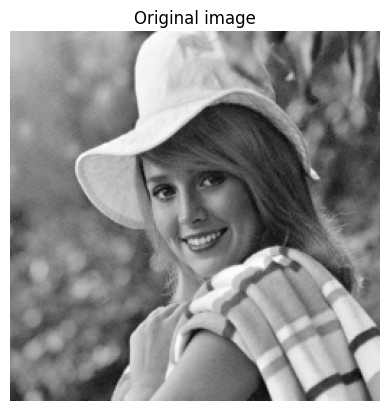

In [2]:
image = load_image('images/elaine.png')
image = image.astype(np.float32) / 255.0

print("Image shape:", image.shape)
print("Image dtype:", image.dtype)
print("Image size:", image.size)
print("Image min:", image.min())
print("Image max:", image.max())
print("Image mean:", image.mean())
print("Image std:", image.std())

plt.imshow(image, cmap='gray')
plt.title(f'Original image')
plt.axis('off')
plt.show()

In [3]:
blocks = blockify(image, 8, 8)
flattened_blocks = blocks.reshape(-1, 8*8)
print("Flattened blocks shape:", flattened_blocks.shape)
centered_blocks, mean_vector = mean_center(flattened_blocks)
#std = np.std(flattened_blocks, axis=0)
#print("std vector shape:", std.shape)
print("mean vector shape:", mean_vector.shape)
#centered_blocks /= std
#centered_blocks

Flattened blocks shape: (1024, 64)
mean vector shape: (64,)


Number of components: 8
Training in sequential mode
- Sequential training: component 1/8
Principal components: 


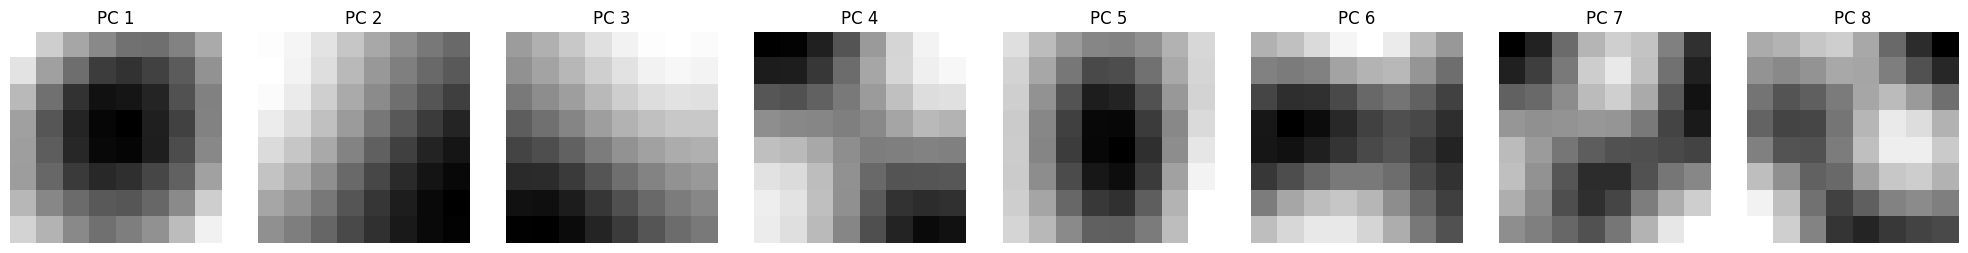

Did the components converge to form a orthonormal basis: False
Component coefficients:


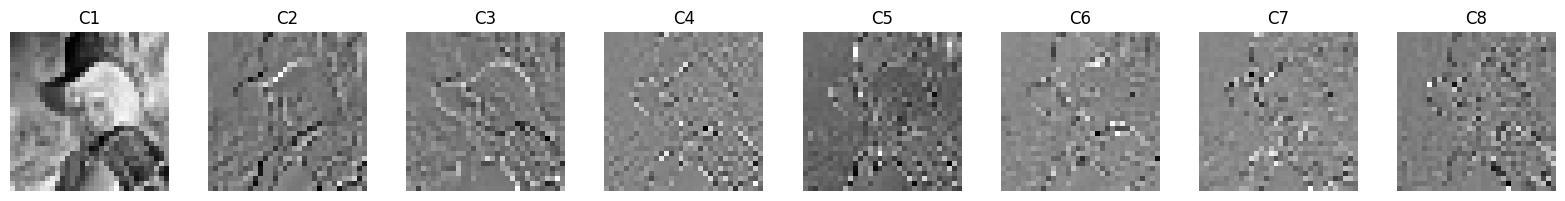

MSE: 0.0007279449146089618


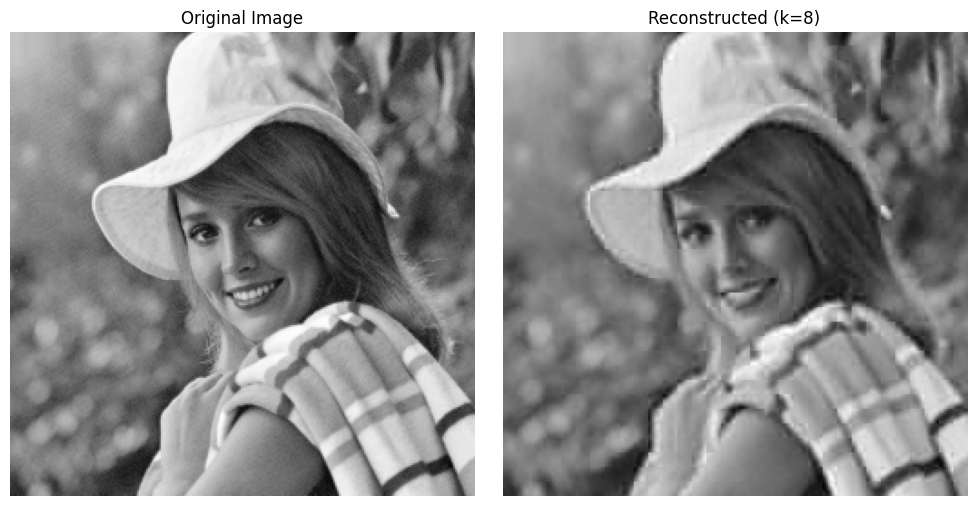

Number of components: 16
Training in sequential mode
- Sequential training: component 1/16
- Sequential training: component 9/16
Principal components: 


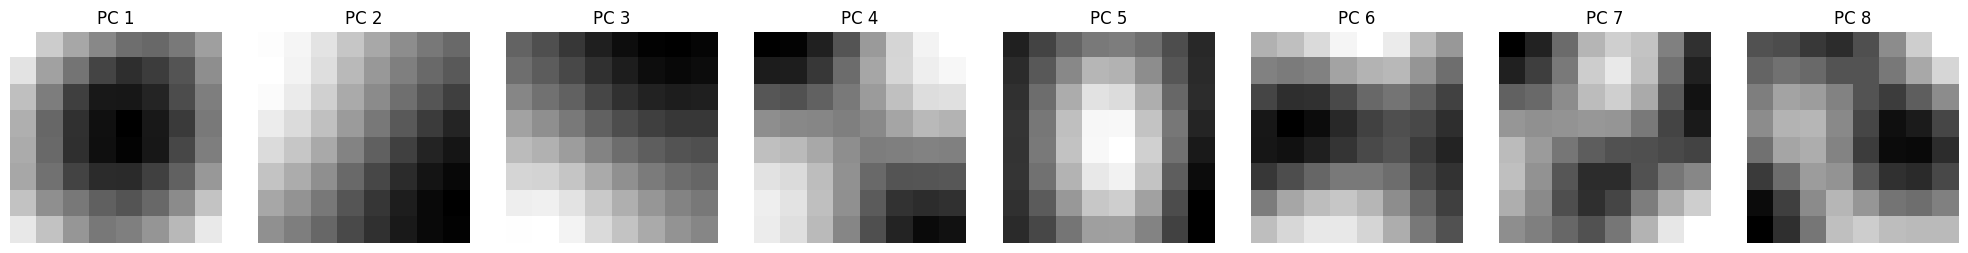

Did the components converge to form a orthonormal basis: False
Component coefficients:


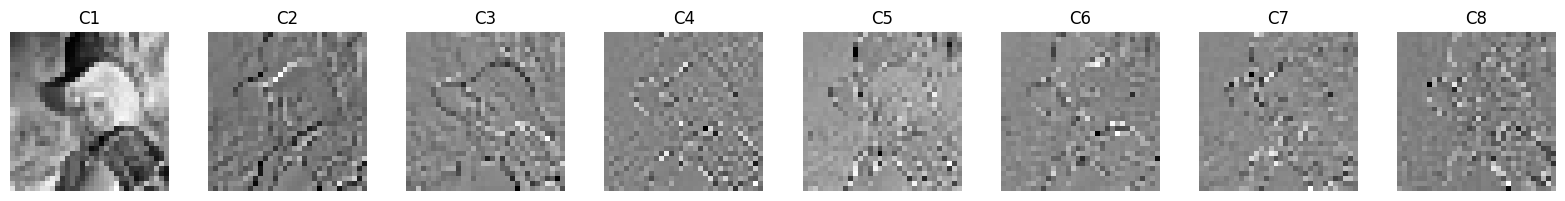

MSE: 0.00033267461880202235


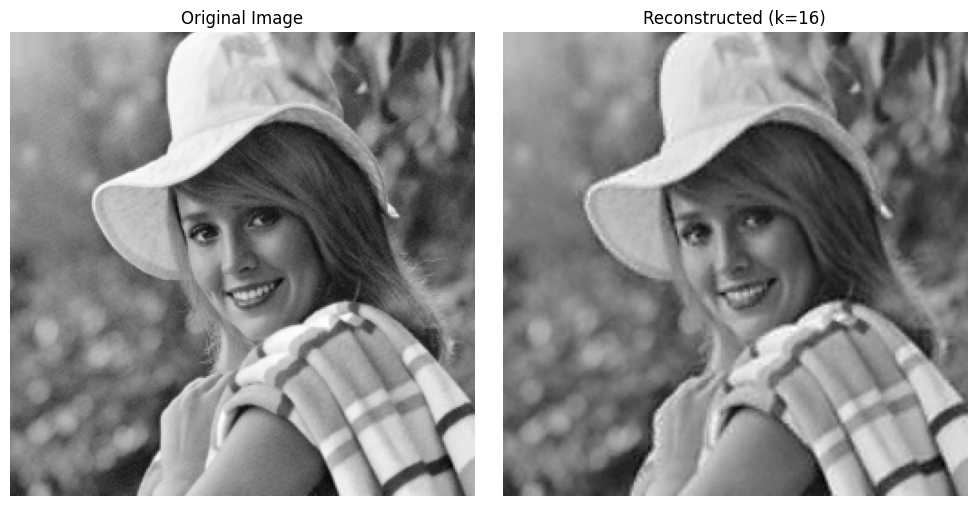

Number of components: 32
Training in parallel mode
- Epoch 0/6000
- Epoch 1000/6000
- Epoch 2000/6000
- Epoch 3000/6000
- Epoch 4000/6000
- Epoch 5000/6000
Principal components: 


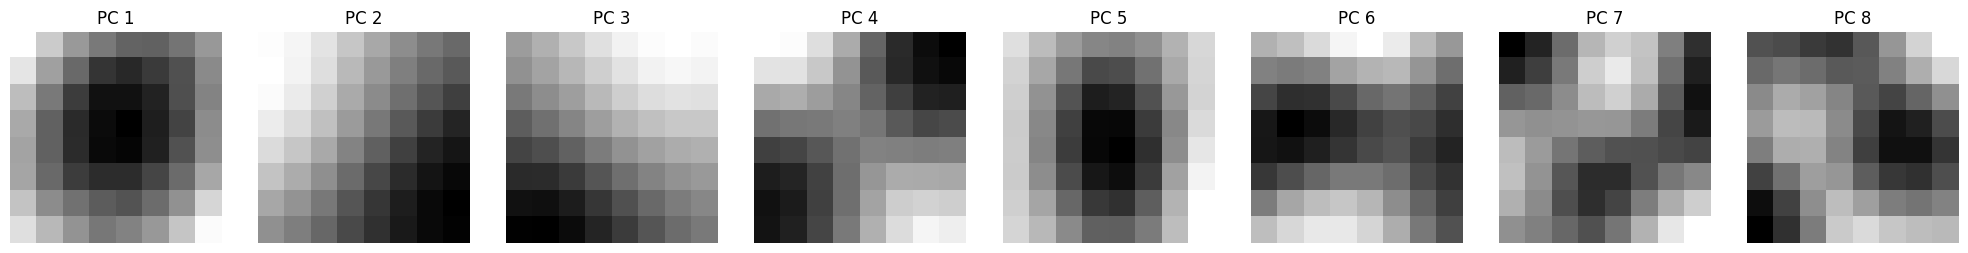

Did the components converge to form a orthonormal basis: False
Component coefficients:


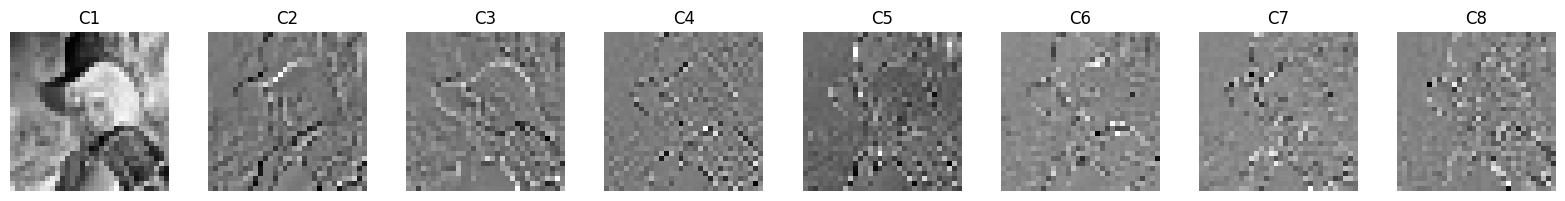

MSE: 0.00017588854067762455


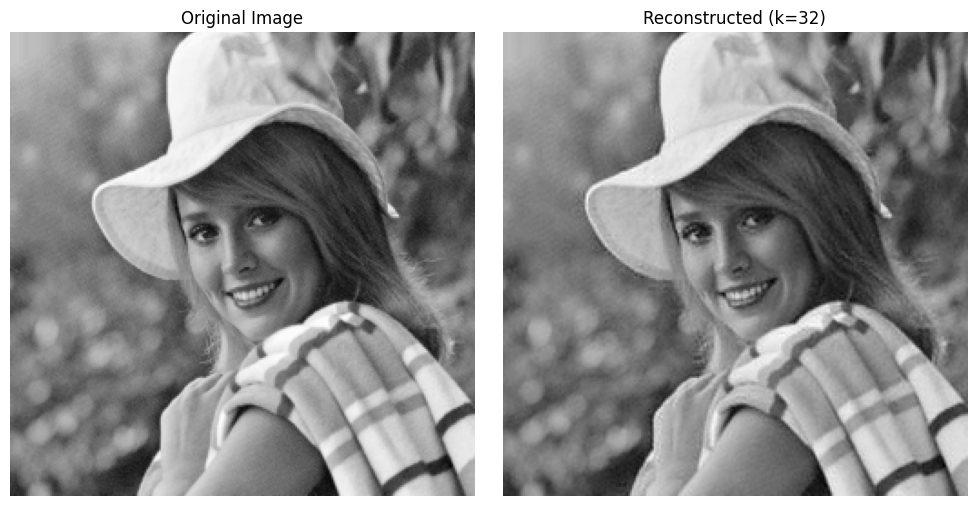

Number of components: 48
Training in parallel mode
- Epoch 0/6000
- Epoch 1000/6000
- Epoch 2000/6000
- Epoch 3000/6000
- Epoch 4000/6000
- Epoch 5000/6000
Principal components: 


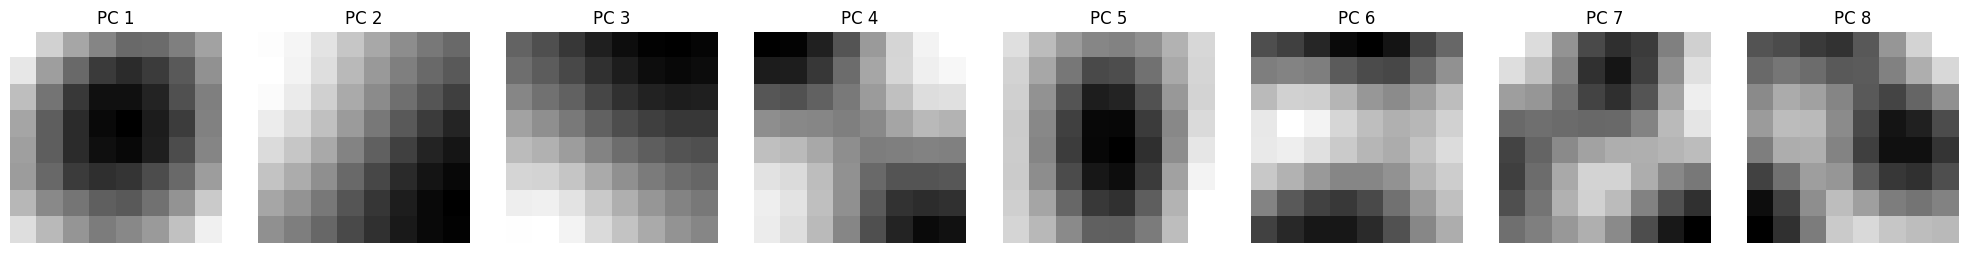

Did the components converge to form a orthonormal basis: False
Component coefficients:


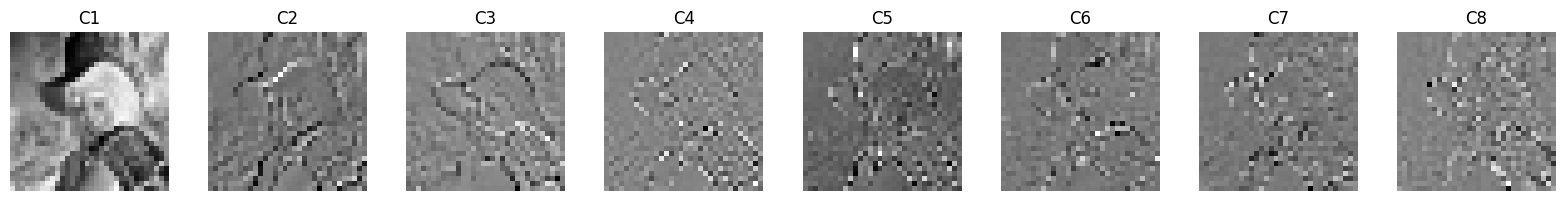

MSE: 0.0001504669481041935


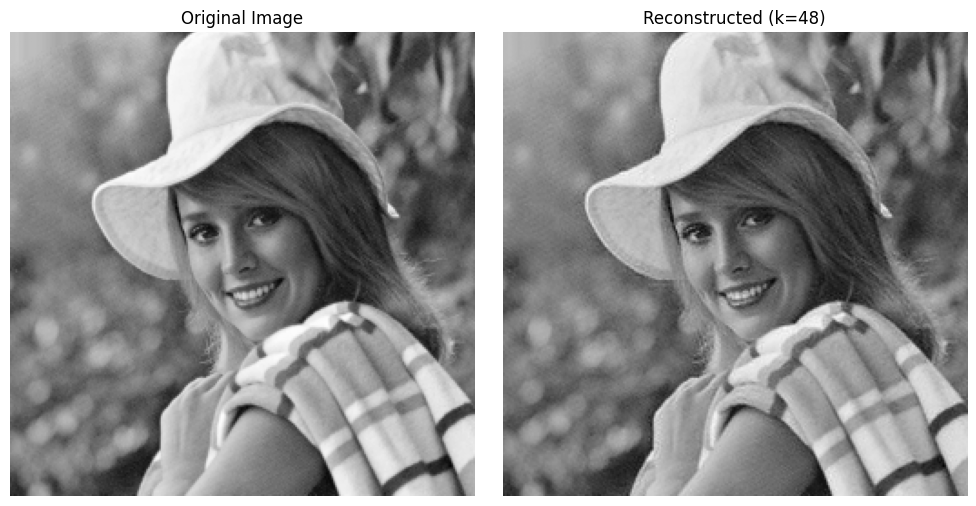

Number of components: 64
Training in parallel mode
- Epoch 0/6000
- Epoch 1000/6000
- Epoch 2000/6000
- Epoch 3000/6000
- Epoch 4000/6000
- Epoch 5000/6000
Principal components: 


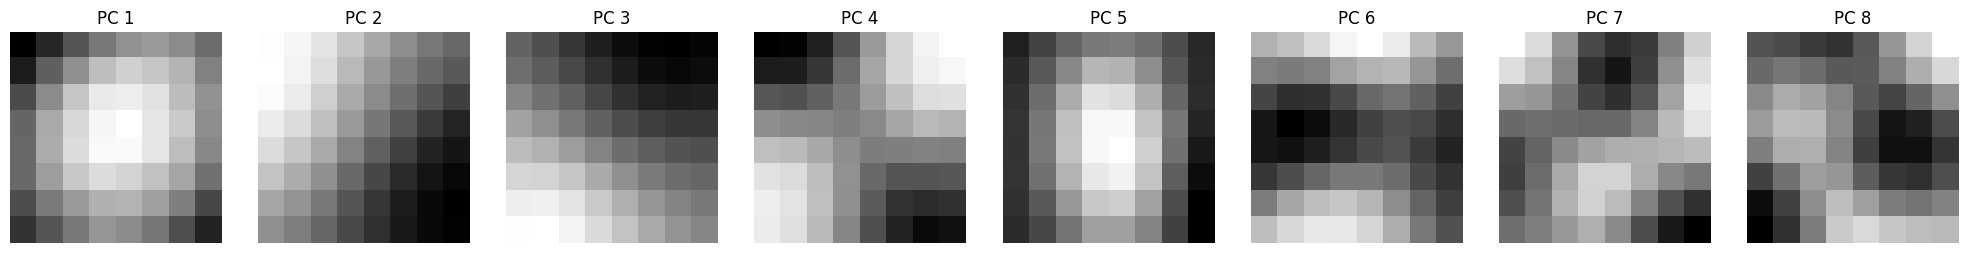

Did the components converge to form a orthonormal basis: False
Component coefficients:


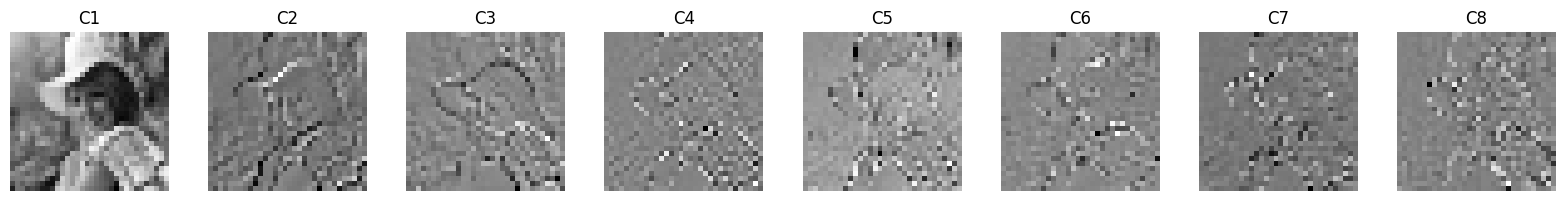

MSE: 0.00020463774360441047


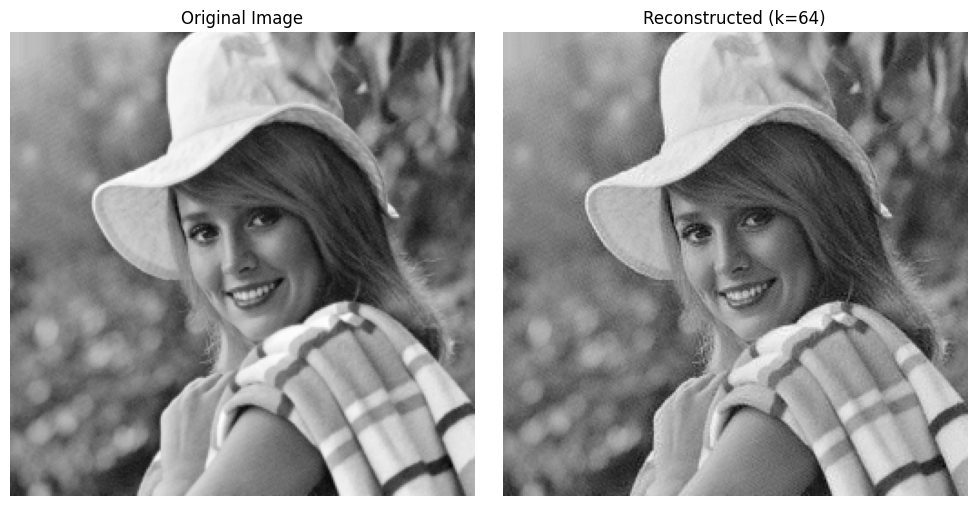

In [4]:
ks = (8, 16, 32, 48, 64)
models = dict()

for k in ks:
    print(f"Number of components: {k}")
    
    gha = GHA(input_dim=64, num_components=k)
    if k > 16:
        print("Training in parallel mode")
        gha.train_parallel(centered_blocks, epochs=6000, lr_s=0.001, lr_f=0.0001)
    else:
        print("Training in sequential mode")
        gha.train_sequential(centered_blocks, epochs_per_component=450, lr_s=0.001, lr_f=0.0001)
    
    models[k] = gha

    components = gha.get_components()
    print("Principal components: ")
    visualize_components(components, 1, 8)
    #print("Components shape:", components.shape)
    print(f"Did the components converge to form a orthonormal basis: {np.allclose(components @ components.T, np.eye(k))}")

    encoded_blocks = encode_blocks(flattened_blocks, mean_vector, components)
    print("Component coefficients:")
    visualize_component_coefficients(encoded_blocks, num_components=8)
    #print(f"Encoded shape: {encoded_blocks.shape}") # (1024,k)

    reconstructed_image = reconstruct_image(encoded_blocks, mean_vector, components)

    #print("Original image dtype:", image.dtype)
    #print("Original min/max:", image.min(), image.max())
    #print("Original image shape:", image.shape)

    #print("Reconstructed dtype:", reconstructed_image.dtype)
    #print("Reconstructed min/max:", reconstructed_image.min(), reconstructed_image.max())
    #print("Reconstructed image shape:", reconstructed_image.shape)


    print(f"MSE: {np.mean((image - reconstructed_image) ** 2)}")
    show_original_vs_reconstructed(image, reconstructed_image, k)

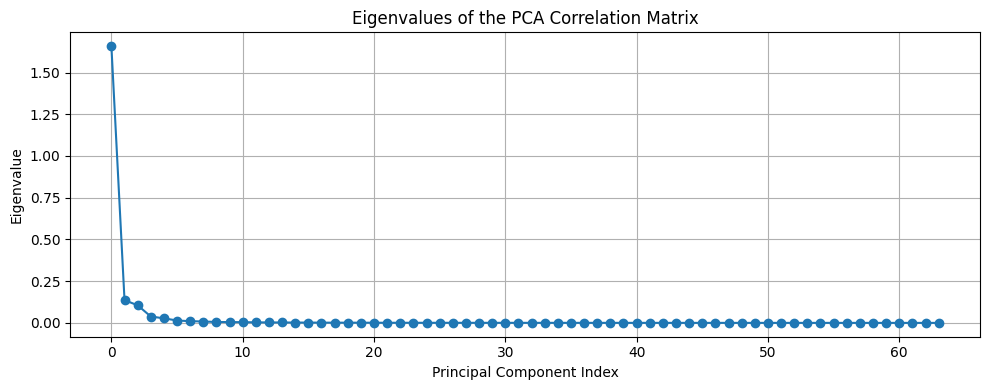

In [5]:
centered_blocks.shape
plot_pca_eigenvalues(centered_blocks)


(256, 256)


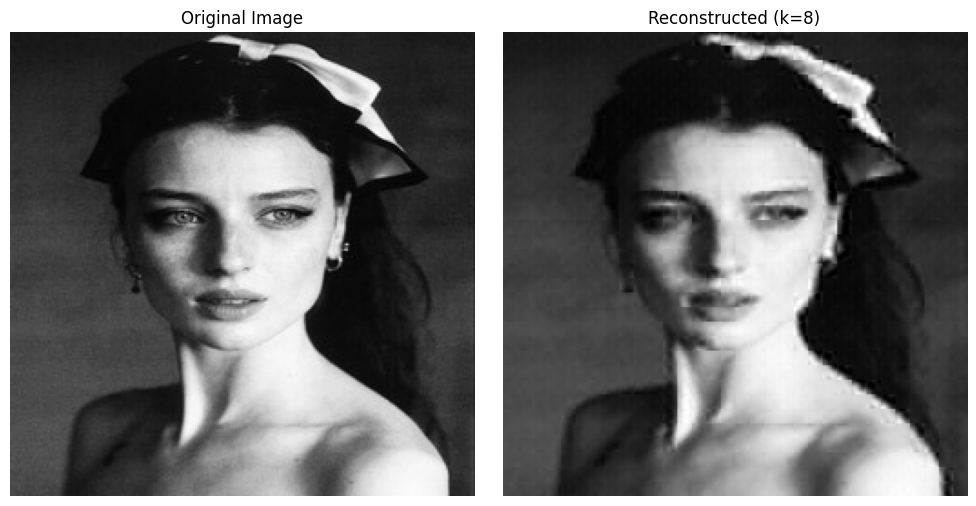

images/1.jpg MSE: 0.0009906879059514728
(256, 256)


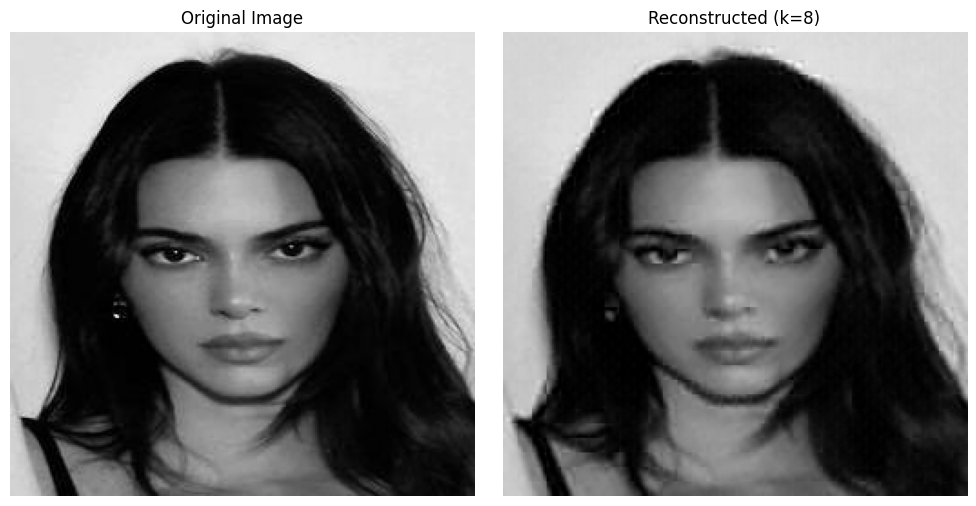

images/2.jpg MSE: 0.000574490977050542


In [11]:
k=8
components = models[k].get_components()

other_images = ['images/1.jpg', 'images/2.jpg']

for path in other_images:
    img = load_image(path).astype(np.float32) / 255.0
    print(img.shape)
    blocks = blockify(img, 8, 8)
    flat_blocks = blocks.reshape(-1, 64)
    codes = encode_blocks(flat_blocks, mean_vector, components)
    recon = reconstruct_image(codes, mean_vector, components)
    show_original_vs_reconstructed(img, recon, k)
    print(f"{path} MSE: {np.mean((img - recon)**2)}")